In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")
sns.set(font_scale=2) 

# Visualization of eventlogs 2018 and 2019

Preparation of the 2018 eventlog for further analyses:

In [3]:
data_2018= pd.read_csv("D:/Uni Köln/Ausland/Courses/Business Analysis/Business Process Management/Assignment/eventlog2018.csv", sep=";")

C:\Users\vikto\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_2018

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
0,bec3f3f6ee2ad09c-20652.65,Payment application-Application-mail income,NaN,20.04.2018 00:00:00,"65,4242",4e,14,"20660,53",NaN,NaN,NaN,FALSCH,2018,FALSCH,mail income,Payment application,Application
1,bec3f3f6ee2ad09c-20652.65,Payment application-Application-mail valid,NaN,29.04.2018 00:00:00,"65,4242",4e,14,"20660,53",NaN,NaN,NaN,FALSCH,2018,FALSCH,mail valid,Payment application,Application
2,bec3f3f6ee2ad09c-20652.65,Geo parcel document-Main-initialize,Document processing automaton,22.06.2018 15:51:04,"65,4242",4e,14,"20660,53",NaN,NaN,NaN,FALSCH,2018,FALSCH,initialize,Geo parcel document,Main
3,bec3f3f6ee2ad09c-20652.65,Geo parcel document-Declared-begin editing,Document processing automaton,22.06.2018 15:51:04,"65,4242",4e,14,"20660,53",NaN,NaN,NaN,FALSCH,2018,FALSCH,begin editing,Geo parcel document,Declared
4,bec3f3f6ee2ad09c-20652.65,Geo parcel document-Declared-finish editing,Document processing automaton,22.06.2018 15:51:05,"65,4242",4e,14,"20660,53",NaN,NaN,NaN,FALSCH,2018,FALSCH,finish editing,Geo parcel document,Declared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368890,670ce35c01eaffc2-28724.13,Payment application-Application-begin payment,DP-Z,17.12.2018 09:26:59,"95,7875",4e,26,"28735,51",NaN,NaN,NaN,FALSCH,2018,FALSCH,begin payment,Payment application,Application
368891,670ce35c01eaffc2-28724.13,Payment application-Application-abort payment,DP-Z,20.12.2018 07:54:26,"95,7875",4e,26,"28735,51",NaN,NaN,NaN,FALSCH,2018,FALSCH,abort payment,Payment application,Application
368892,670ce35c01eaffc2-28724.13,Payment application-Application-begin payment,DP-Z,20.12.2018 11:56:16,"95,7875",4e,26,"28735,51",NaN,NaN,NaN,FALSCH,2018,FALSCH,begin payment,Payment application,Application
368893,670ce35c01eaffc2-28724.13,Payment application-Application-insert document,Notification automaton,21.12.2018 13:48:45,"95,7875",4e,26,"28735,51",NaN,NaN,NaN,FALSCH,2018,FALSCH,insert document,Payment application,Application


In [5]:
data_2018.columns

Index(['case id', 'combined_activity', 'resource', 'complete timestamp',
       'area', 'department', 'number_parcels', 'payment_actual0',
       'payment_actual1', 'payment_actual2', 'payment_actual3', 'small_farmer',
       'year', 'young_farmer', 'activity', 'doctype', 'subprocess'],
      dtype='object')

In [6]:
data_2018.dtypes

case id                object
combined_activity      object
resource               object
complete timestamp     object
area                   object
department             object
number_parcels          int64
payment_actual0        object
payment_actual1        object
payment_actual2        object
payment_actual3       float64
small_farmer           object
year                    int64
young_farmer           object
activity               object
doctype                object
subprocess             object
dtype: object

In [7]:
data_2018["area"].values

array(['65,4242', '65,4242', '65,4242', ..., '95,7875', '95,7875',
       '95,7875'], dtype=object)

In [8]:
data_2018["payment_actual0"] = data_2018["payment_actual0"].str.replace(',', '.').astype(float)
data_2018["payment_actual1"] = data_2018["payment_actual1"].str.replace(',', '.').astype(float)
data_2018["payment_actual2"] = data_2018["payment_actual2"].str.replace(',', '.').astype(float)
data_2018["area"] = data_2018["area"].str.replace(',', '.').astype(float)
#data_pay_obj_ch["payment_actual3_y"] = data_pay_obj_ch["payment_actual3_y"].str.replace(',', '.').astype(float)

In [9]:
data_2018["small_farmer"]= data_2018["small_farmer"].astype(str)
data_2018["young_farmer"]= data_2018["young_farmer"].astype(str)

In [10]:
data_2018["small_farmer"] = data_2018.apply(lambda x: "Yes" if x["small_farmer"] == "WAHR" else "No", axis=1)
data_2018["young_farmer"] = data_2018.apply(lambda x: "Yes" if x["young_farmer"] == "WAHR" else "No", axis=1)

In [11]:
data_2018.describe()

,area,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,year
count,368895.000000,368895.000000,368895.000000,17021.000000,156.000000,0.0,368895.0
mean,45.131926,13.190133,14540.865520,-307.962371,-503.565962,NaN,2018.0
std,58.527422,13.819650,25848.452515,680.526888,113.926649,NaN,0.0
min,0.000000,0.000000,16.250000,-5034.970000,-612.840000,NaN,2018.0
25%,5.862700,3.000000,1884.650000,-290.440000,-612.840000,NaN,2018.0
50%,19.393600,8.000000,6487.700000,-139.380000,-612.840000,NaN,2018.0
75%,67.204000,19.000000,21179.190000,-103.370000,-385.550000,NaN,2018.0
max,561.933100,96.000000,587857.370000,2013.410000,-385.550000,NaN,2018.0


In [12]:
data_2018['case id'].nunique()

8564

Preparation of the 2019 eventlog for further analyses:

In [13]:
data_2019= pd.read_csv("D:/Uni Köln/Ausland/Courses/Business Analysis/Business Process Management/Assignment/eventlog2019.csv", sep=";")

C:\Users\vikto\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data_2019

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
0,adcbf6cccf7e6c89-6512.07,Payment application-Application-mail income,NaN,07.04.2019 00:00:00,"16,7491",6b,36,"6510,65",NaN,NaN,NaN,FALSCH,2019,WAHR,mail income,Payment application,Application
1,adcbf6cccf7e6c89-6512.07,Payment application-Application-mail valid,NaN,25.04.2019 00:00:00,"16,7491",6b,36,"6510,65",NaN,NaN,NaN,FALSCH,2019,WAHR,mail valid,Payment application,Application
2,adcbf6cccf7e6c89-6512.07,Geo parcel document-Main-initialize,Document processing automaton,01.05.2019 06:28:07,"16,7491",6b,36,"6510,65",NaN,NaN,NaN,FALSCH,2019,WAHR,initialize,Geo parcel document,Main
3,adcbf6cccf7e6c89-6512.07,Geo parcel document-Declared-begin editing,Document processing automaton,01.05.2019 06:28:07,"16,7491",6b,36,"6510,65",NaN,NaN,NaN,FALSCH,2019,WAHR,begin editing,Geo parcel document,Declared
4,adcbf6cccf7e6c89-6512.07,Control summary-Main-initialize,Document processing automaton,01.05.2019 06:28:08,"16,7491",6b,36,"6510,65",NaN,NaN,NaN,FALSCH,2019,WAHR,initialize,Control summary,Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457500,ad5dfa0b929735be-5117.97,Payment application-Application-decide,155add,11.12.2019 10:26:40,"15,2806",6b,6,"5116,99",NaN,NaN,NaN,FALSCH,2019,FALSCH,decide,Payment application,Application
457501,ad5dfa0b929735be-5117.97,Payment application-Application-begin payment,DP-Z,15.12.2019 16:00:12,"15,2806",6b,6,"5116,99",NaN,NaN,NaN,FALSCH,2019,FALSCH,begin payment,Payment application,Application
457502,ad5dfa0b929735be-5117.97,Payment application-Application-insert document,Notification automaton,15.12.2019 19:19:04,"15,2806",6b,6,"5116,99",NaN,NaN,NaN,FALSCH,2019,FALSCH,insert document,Payment application,Application
457503,ad5dfa0b929735be-5117.97,Payment application-Application-insert document,Notification automaton,20.12.2019 09:02:30,"15,2806",6b,6,"5116,99",NaN,NaN,NaN,FALSCH,2019,FALSCH,insert document,Payment application,Application


In [15]:
data_2019.columns

Index(['case id', 'combined_activity', 'resource', 'complete timestamp',
       'area', 'department', 'number_parcels', 'payment_actual0',
       'payment_actual1', 'payment_actual2', 'payment_actual3', 'small_farmer',
       'year', 'young_farmer', 'activity', 'doctype', 'subprocess'],
      dtype='object')

In [16]:
data_2019.dtypes

case id                object
combined_activity      object
resource               object
complete timestamp     object
area                   object
department             object
number_parcels          int64
payment_actual0        object
payment_actual1        object
payment_actual2       float64
payment_actual3       float64
small_farmer           object
year                    int64
young_farmer           object
activity               object
doctype                object
subprocess             object
dtype: object

In [17]:
data_2019["payment_actual0"] = data_2019["payment_actual0"].str.replace(',', '.').astype(float)
data_2019["payment_actual1"] = data_2019["payment_actual1"].str.replace(',', '.').astype(float)
#data_2019["payment_actual2"] = data_2019["payment_actual2"].str.replace(',', '.').astype(float)
data_2019["area"] = data_2019["area"].str.replace(',', '.').astype(float)
#data_pay_obj_ch["payment_actual3_y"] = data_pay_obj_ch["payment_actual3_y"].str.replace(',', '.').astype(float)

In [19]:
#concatenate both eventlogs to create one eventlog for both years
data_prepared = pd.concat([data_2018, data_2019])

In [20]:
data_prepared

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
0,bec3f3f6ee2ad09c-20652.65,Payment application-Application-mail income,NaN,20.04.2018 00:00:00,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,mail income,Payment application,Application
1,bec3f3f6ee2ad09c-20652.65,Payment application-Application-mail valid,NaN,29.04.2018 00:00:00,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,mail valid,Payment application,Application
2,bec3f3f6ee2ad09c-20652.65,Geo parcel document-Main-initialize,Document processing automaton,22.06.2018 15:51:04,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,initialize,Geo parcel document,Main
3,bec3f3f6ee2ad09c-20652.65,Geo parcel document-Declared-begin editing,Document processing automaton,22.06.2018 15:51:04,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,begin editing,Geo parcel document,Declared
4,bec3f3f6ee2ad09c-20652.65,Geo parcel document-Declared-finish editing,Document processing automaton,22.06.2018 15:51:05,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,finish editing,Geo parcel document,Declared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457500,ad5dfa0b929735be-5117.97,Payment application-Application-decide,155add,11.12.2019 10:26:40,15.2806,6b,6,5116.99,NaN,NaN,NaN,No,2019,No,decide,Payment application,Application
457501,ad5dfa0b929735be-5117.97,Payment application-Application-begin payment,DP-Z,15.12.2019 16:00:12,15.2806,6b,6,5116.99,NaN,NaN,NaN,No,2019,No,begin payment,Payment application,Application
457502,ad5dfa0b929735be-5117.97,Payment application-Application-insert document,Notification automaton,15.12.2019 19:19:04,15.2806,6b,6,5116.99,NaN,NaN,NaN,No,2019,No,insert document,Payment application,Application
457503,ad5dfa0b929735be-5117.97,Payment application-Application-insert document,Notification automaton,20.12.2019 09:02:30,15.2806,6b,6,5116.99,NaN,NaN,NaN,No,2019,No,insert document,Payment application,Application


# 1. Visualizations of Departments

In [21]:
#filter for the unique case ids for counting the amount of cases per department
data_prepared_case = data_prepared.drop_duplicates(subset='case id', keep="first")

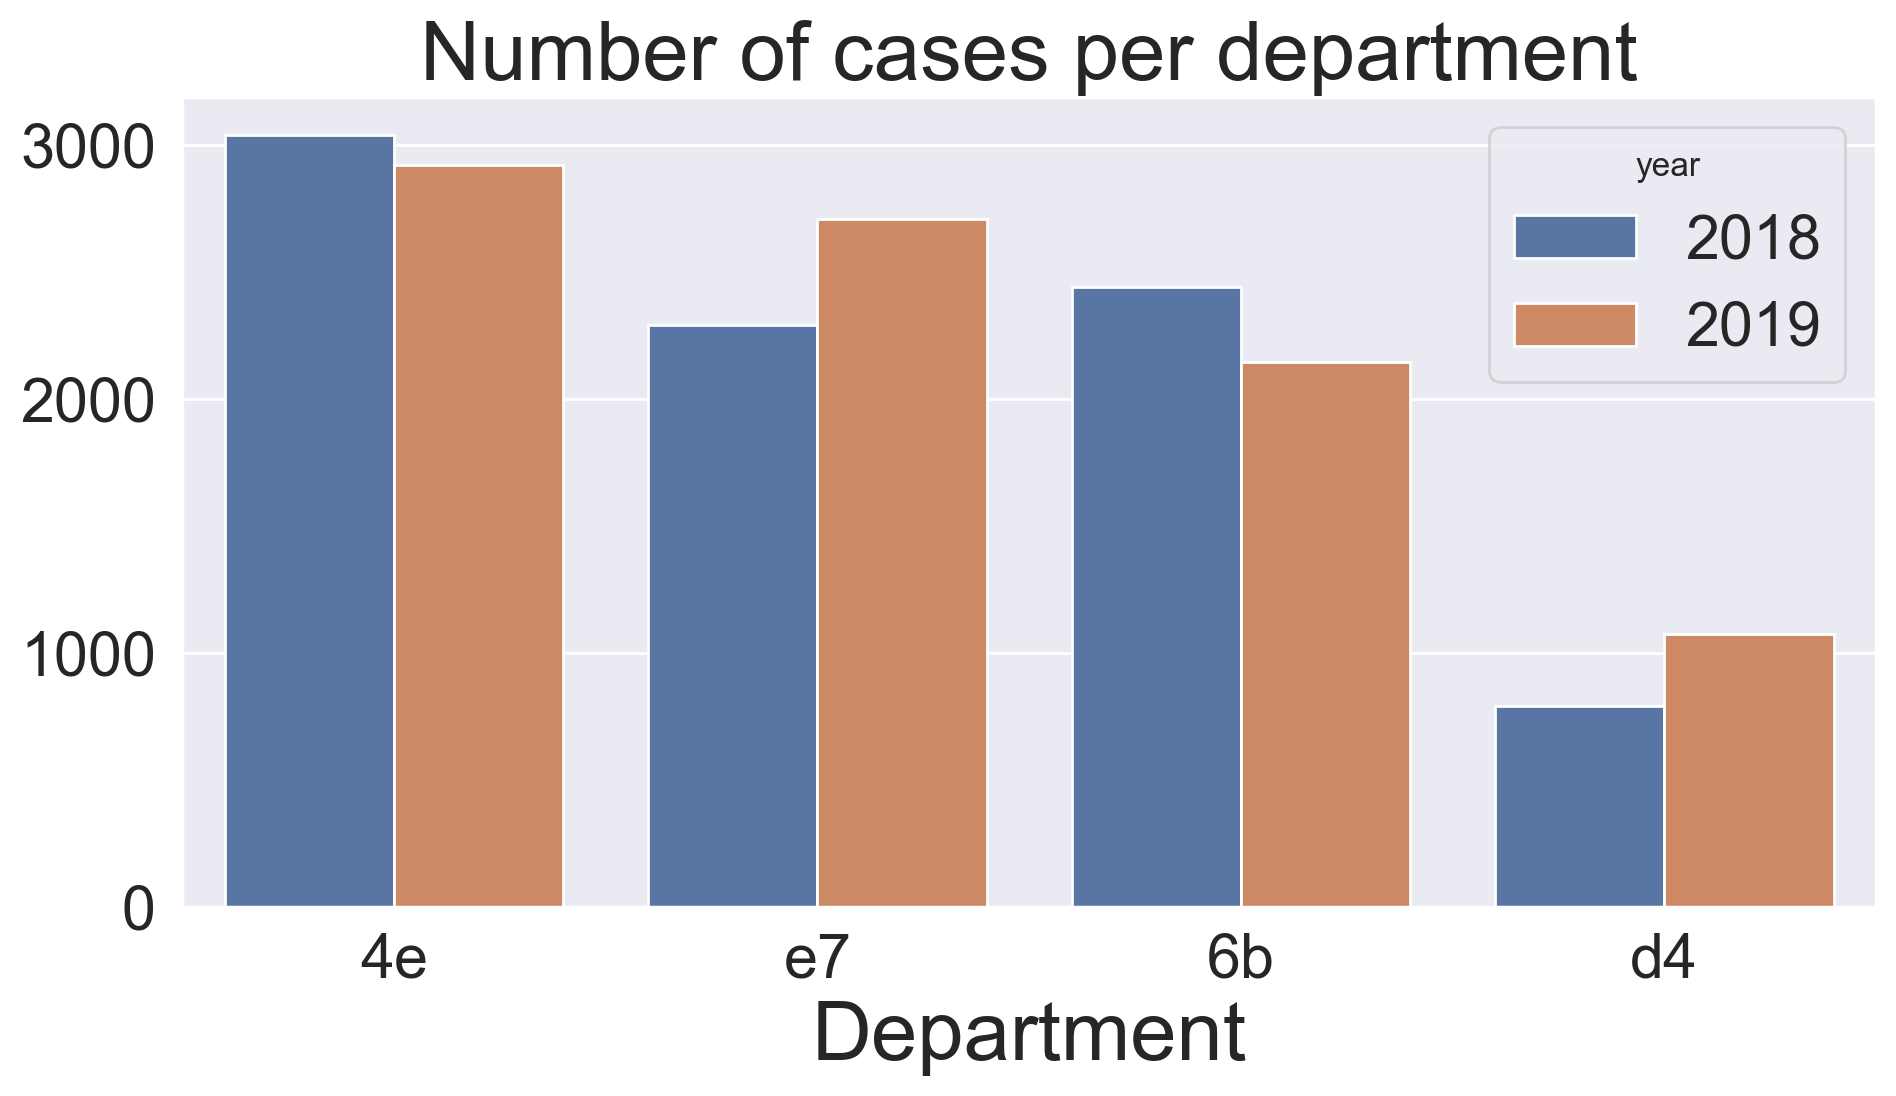

In [22]:
#Number of cases per department
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
sns.countplot(data_prepared_case['department'], hue=data_prepared_case['year'])
ax1.set_xlabel("Department", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of cases per department",fontsize=30)
fig1.tight_layout()
fig1.savefig('Cases_department.png')

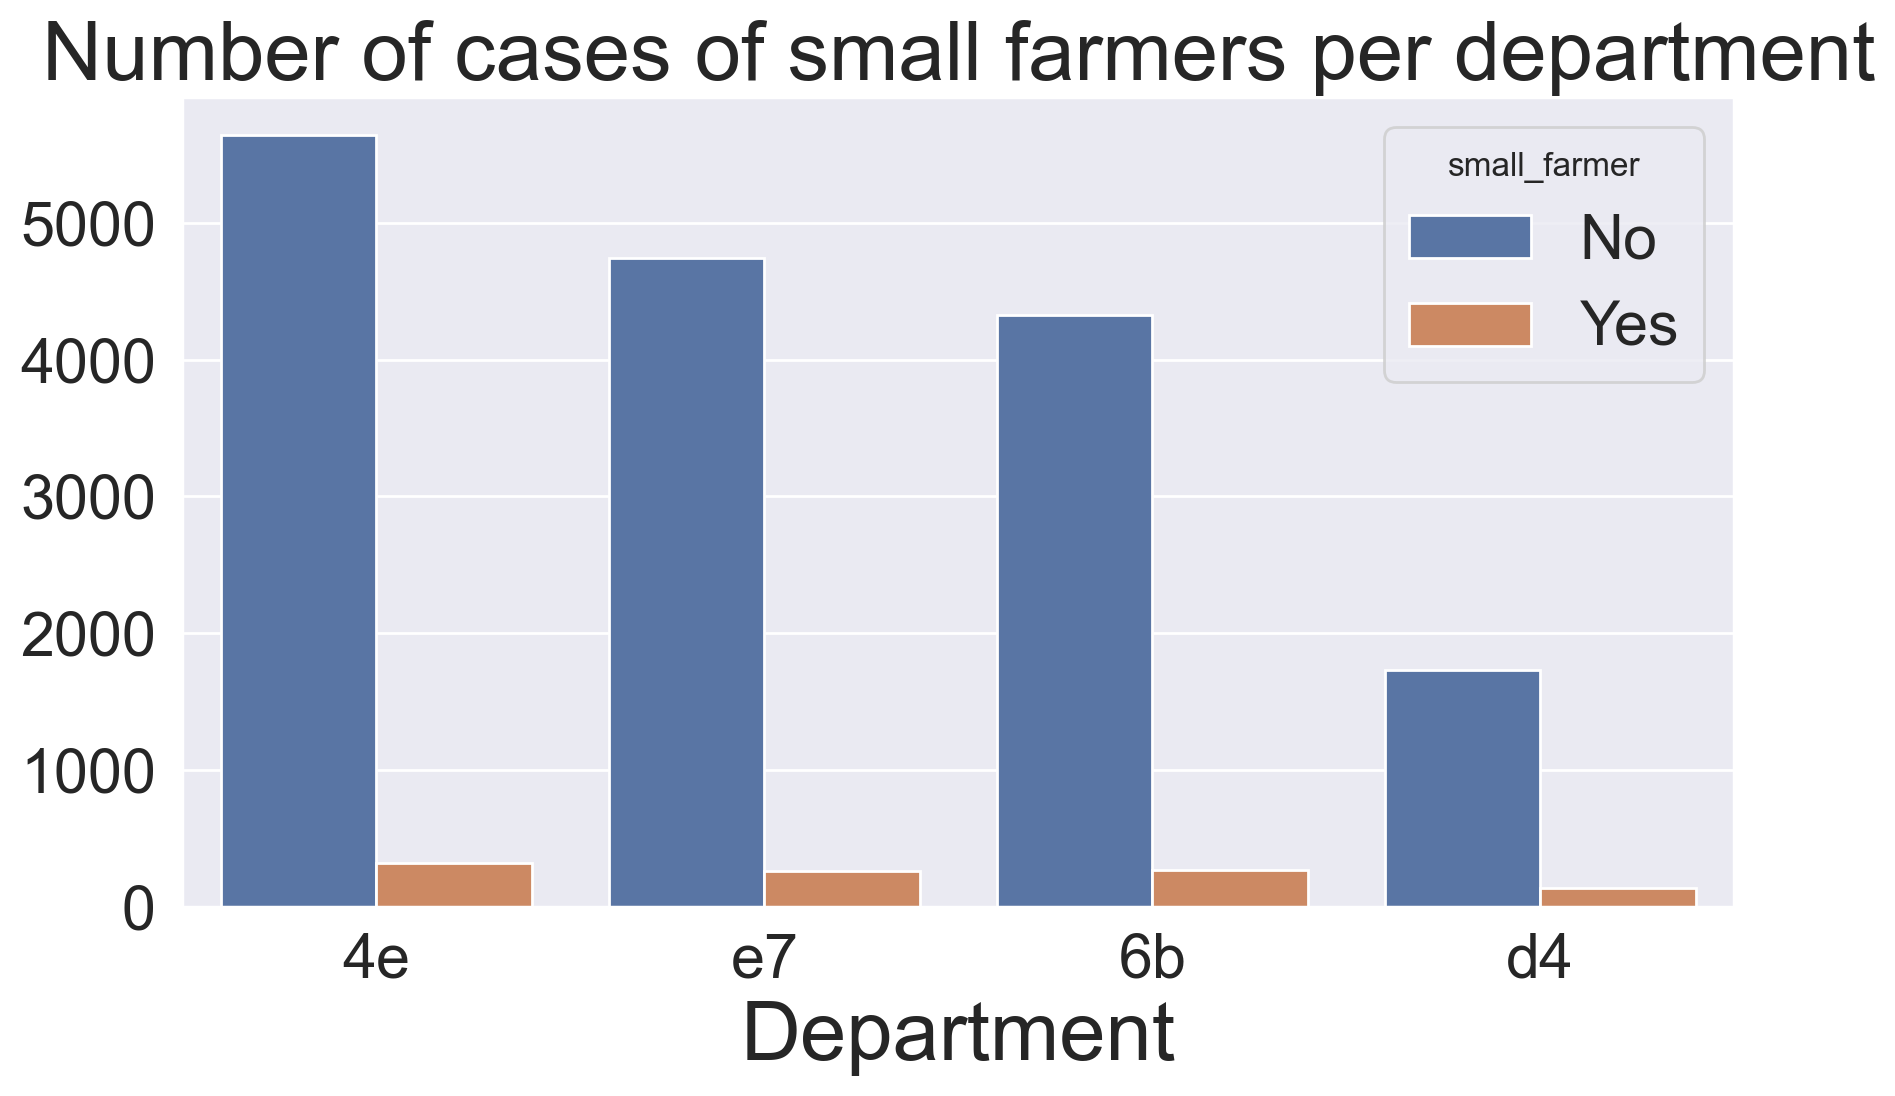

In [23]:
#Number of cases of small farmers per department
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
sns.countplot(data_prepared_case['department'], hue=data_prepared_case['small_farmer'])
ax1.set_xlabel("Department", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of cases of small farmers per department",fontsize=30)
fig1.tight_layout()
fig1.savefig('Cases_small_farmer_department.png')

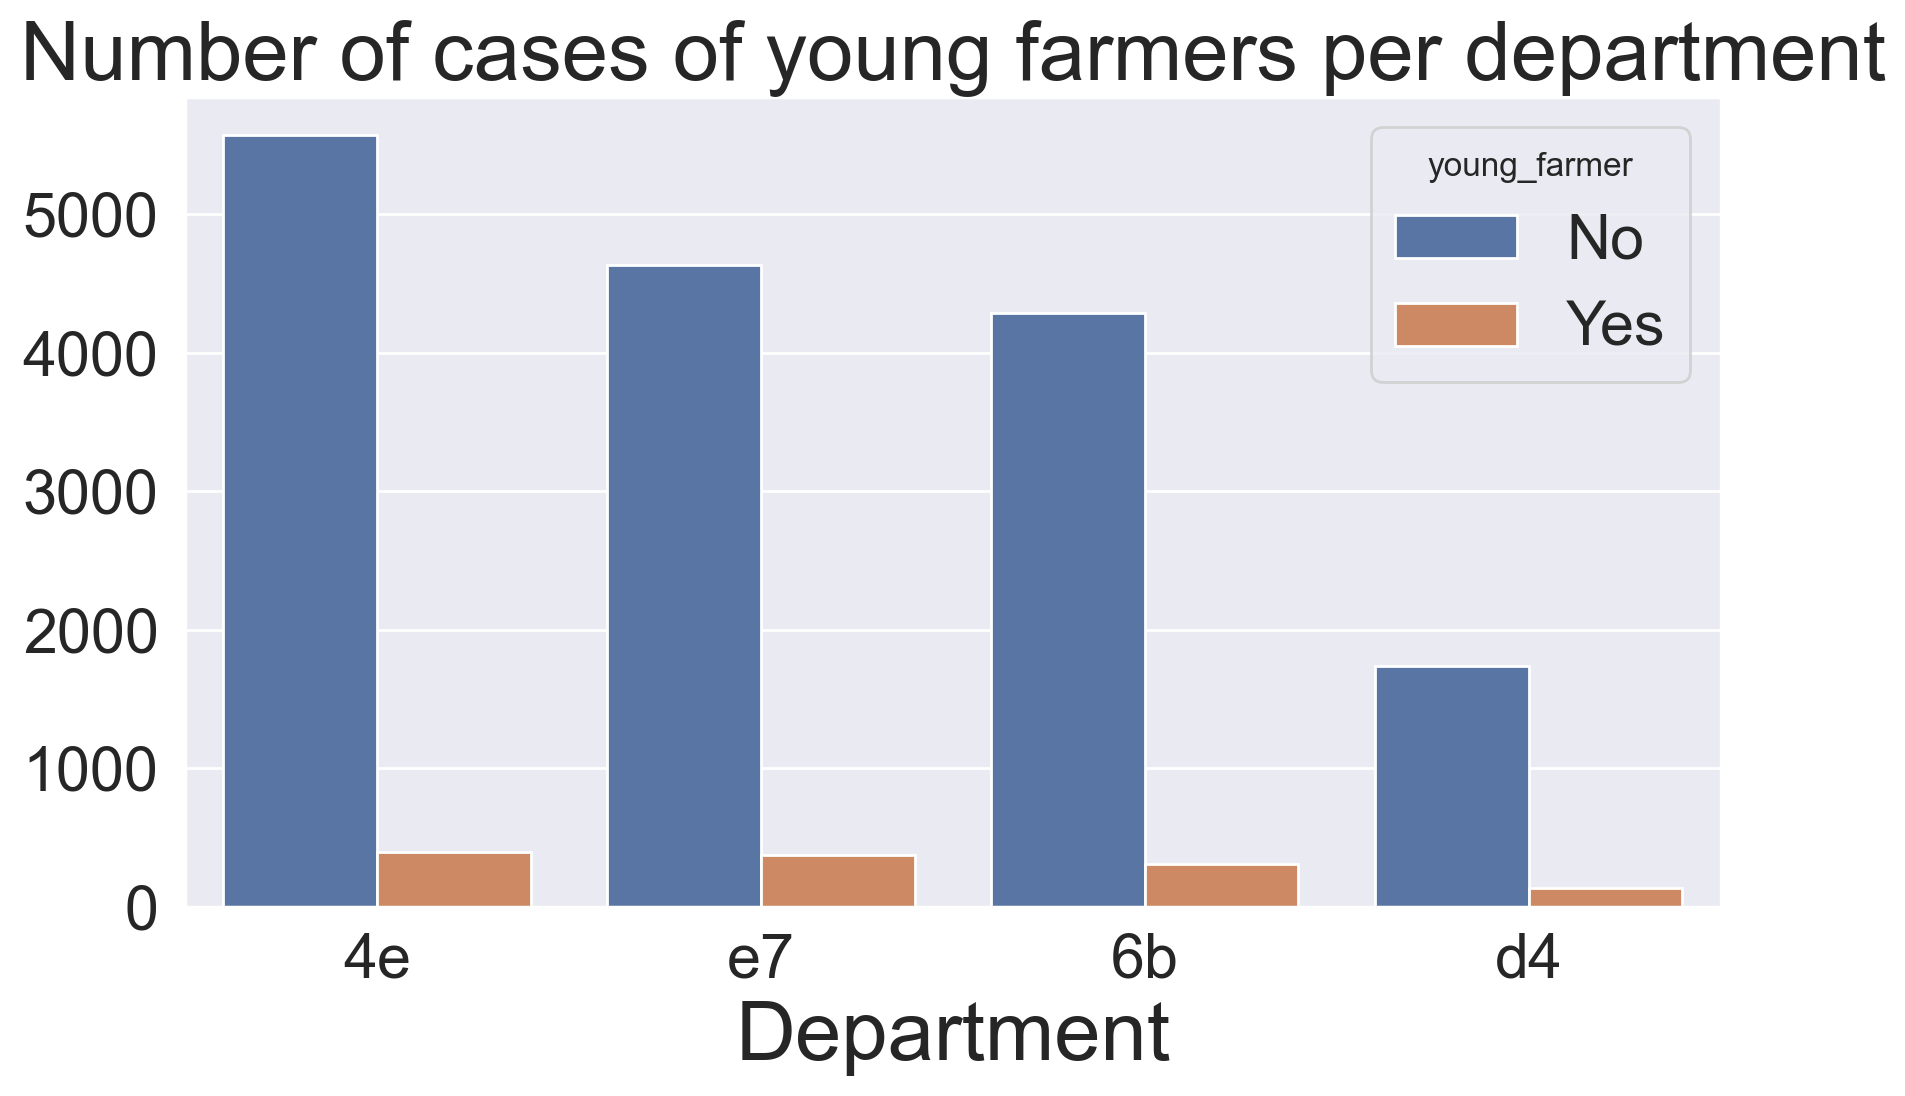

In [24]:
#Number of cases of young farmers per department
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
sns.countplot(data_prepared_case['department'], hue=data_prepared_case['young_farmer'])
ax1.set_xlabel("Department", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of cases of young farmers per department",fontsize=30)
fig1.tight_layout()
fig1.savefig('Cases_young_farmer_department.png')

# 2. Undesired Outcomes 

## 2.1 Late payments

In [33]:
#filter for activity "abort payment"
data_abort_pay = data_prepared[data_prepared["activity"] == "abort payment"]

In [34]:
data_abort_pay

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
41,bec3f3f6ee2ad09c-20652.65,Payment application-Application-abort payment,DP-Z,20.12.2018 07:52:56,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
82,fd8078828eae2f0e-1950.06,Payment application-Application-abort payment,DP-Z,20.12.2018 07:53:31,5.8627,4e,3,1950.06,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
128,3ba8201491258e91-4513.28,Payment application-Application-abort payment,DP-Z,20.12.2018 07:48:42,13.2502,4e,4,4514.26,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
172,49b0354176affca5-22048.89,Payment application-Application-abort payment,DP-Z,20.12.2018 07:47:51,70.7263,4e,32,22057.32,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
262,ff7846dfaa2175d4-13400.66,Payment application-Application-abort payment,DP-Z,19.12.2018 11:51:03,40.5191,6b,21,13365.62,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455622,10695ecbc8e7223a-12504.41,Payment application-Application-abort payment,DP-Z,18.12.2019 12:59:38,38.4677,d4,15,12472.92,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application
456639,07f59536e2b4cdb5-25538.85,Payment application-Application-abort payment,DP-Z,18.12.2019 12:59:58,86.1198,d4,21,25531.13,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application
456792,57fa7fe40fa08d13-926.16,Payment application-Application-abort payment,DP-Z,18.12.2019 13:00:08,2.7612,d4,1,926.16,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application
456950,a0f14125774fac53-2279.63,Payment application-Application-abort payment,DP-Z,18.12.2019 12:59:25,6.9074,d4,3,2279.53,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application


In [43]:
#filter for unique case ids
data_pay_abort = data_abort_pay.drop_duplicates(subset='case id', keep="first")

In [44]:
data_pay_abort

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
41,bec3f3f6ee2ad09c-20652.65,Payment application-Application-abort payment,DP-Z,20.12.2018 07:52:56,65.4242,4e,14,20660.53,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
82,fd8078828eae2f0e-1950.06,Payment application-Application-abort payment,DP-Z,20.12.2018 07:53:31,5.8627,4e,3,1950.06,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
128,3ba8201491258e91-4513.28,Payment application-Application-abort payment,DP-Z,20.12.2018 07:48:42,13.2502,4e,4,4514.26,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
172,49b0354176affca5-22048.89,Payment application-Application-abort payment,DP-Z,20.12.2018 07:47:51,70.7263,4e,32,22057.32,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
262,ff7846dfaa2175d4-13400.66,Payment application-Application-abort payment,DP-Z,19.12.2018 11:51:03,40.5191,6b,21,13365.62,NaN,NaN,NaN,No,2018,No,abort payment,Payment application,Application
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455622,10695ecbc8e7223a-12504.41,Payment application-Application-abort payment,DP-Z,18.12.2019 12:59:38,38.4677,d4,15,12472.92,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application
456639,07f59536e2b4cdb5-25538.85,Payment application-Application-abort payment,DP-Z,18.12.2019 12:59:58,86.1198,d4,21,25531.13,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application
456792,57fa7fe40fa08d13-926.16,Payment application-Application-abort payment,DP-Z,18.12.2019 13:00:08,2.7612,d4,1,926.16,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application
456950,a0f14125774fac53-2279.63,Payment application-Application-abort payment,DP-Z,18.12.2019 12:59:25,6.9074,d4,3,2279.53,NaN,NaN,NaN,No,2019,No,abort payment,Payment application,Application


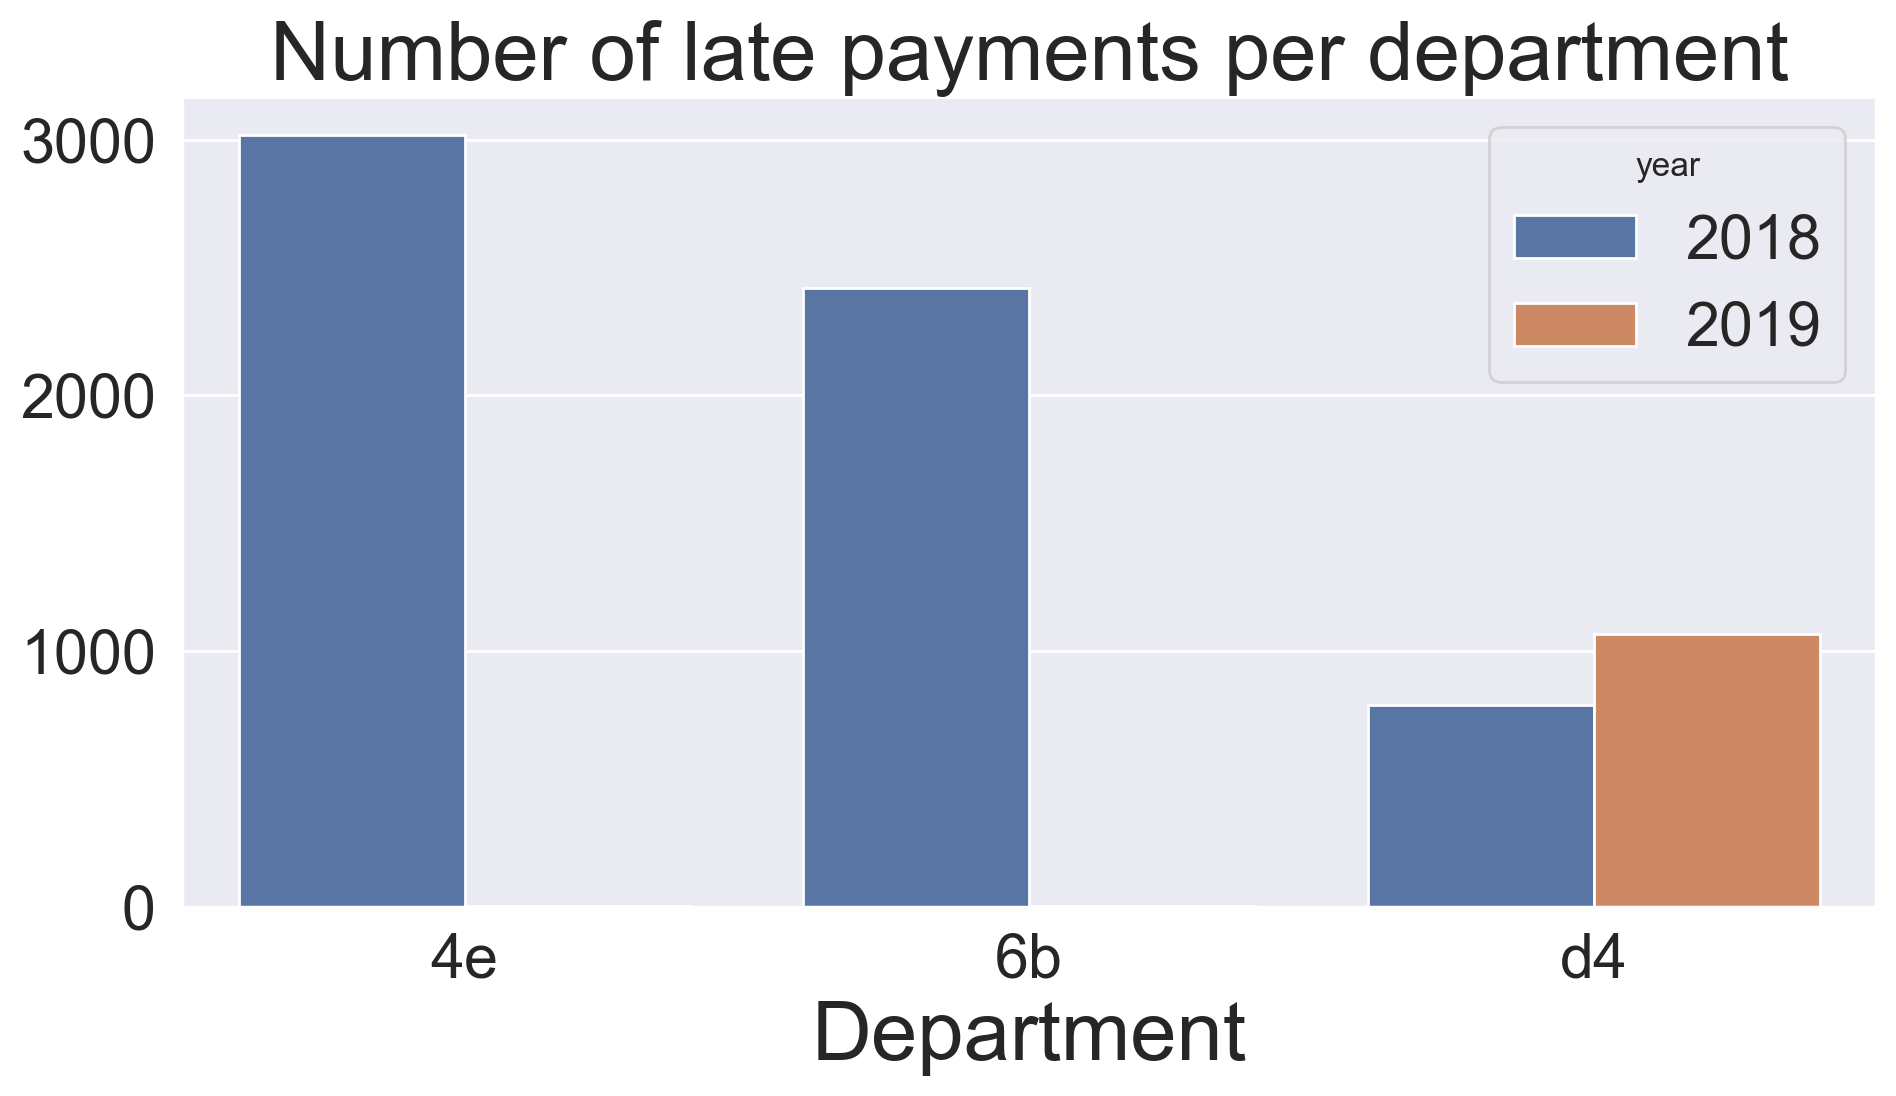

In [46]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
sns.countplot(data_pay_abort['department'], hue=data_pay_abort['year'])
ax1.set_xlabel("Department", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of late payments per department",fontsize=30)
fig1.tight_layout()
fig1.savefig('Late_payments_department.png')

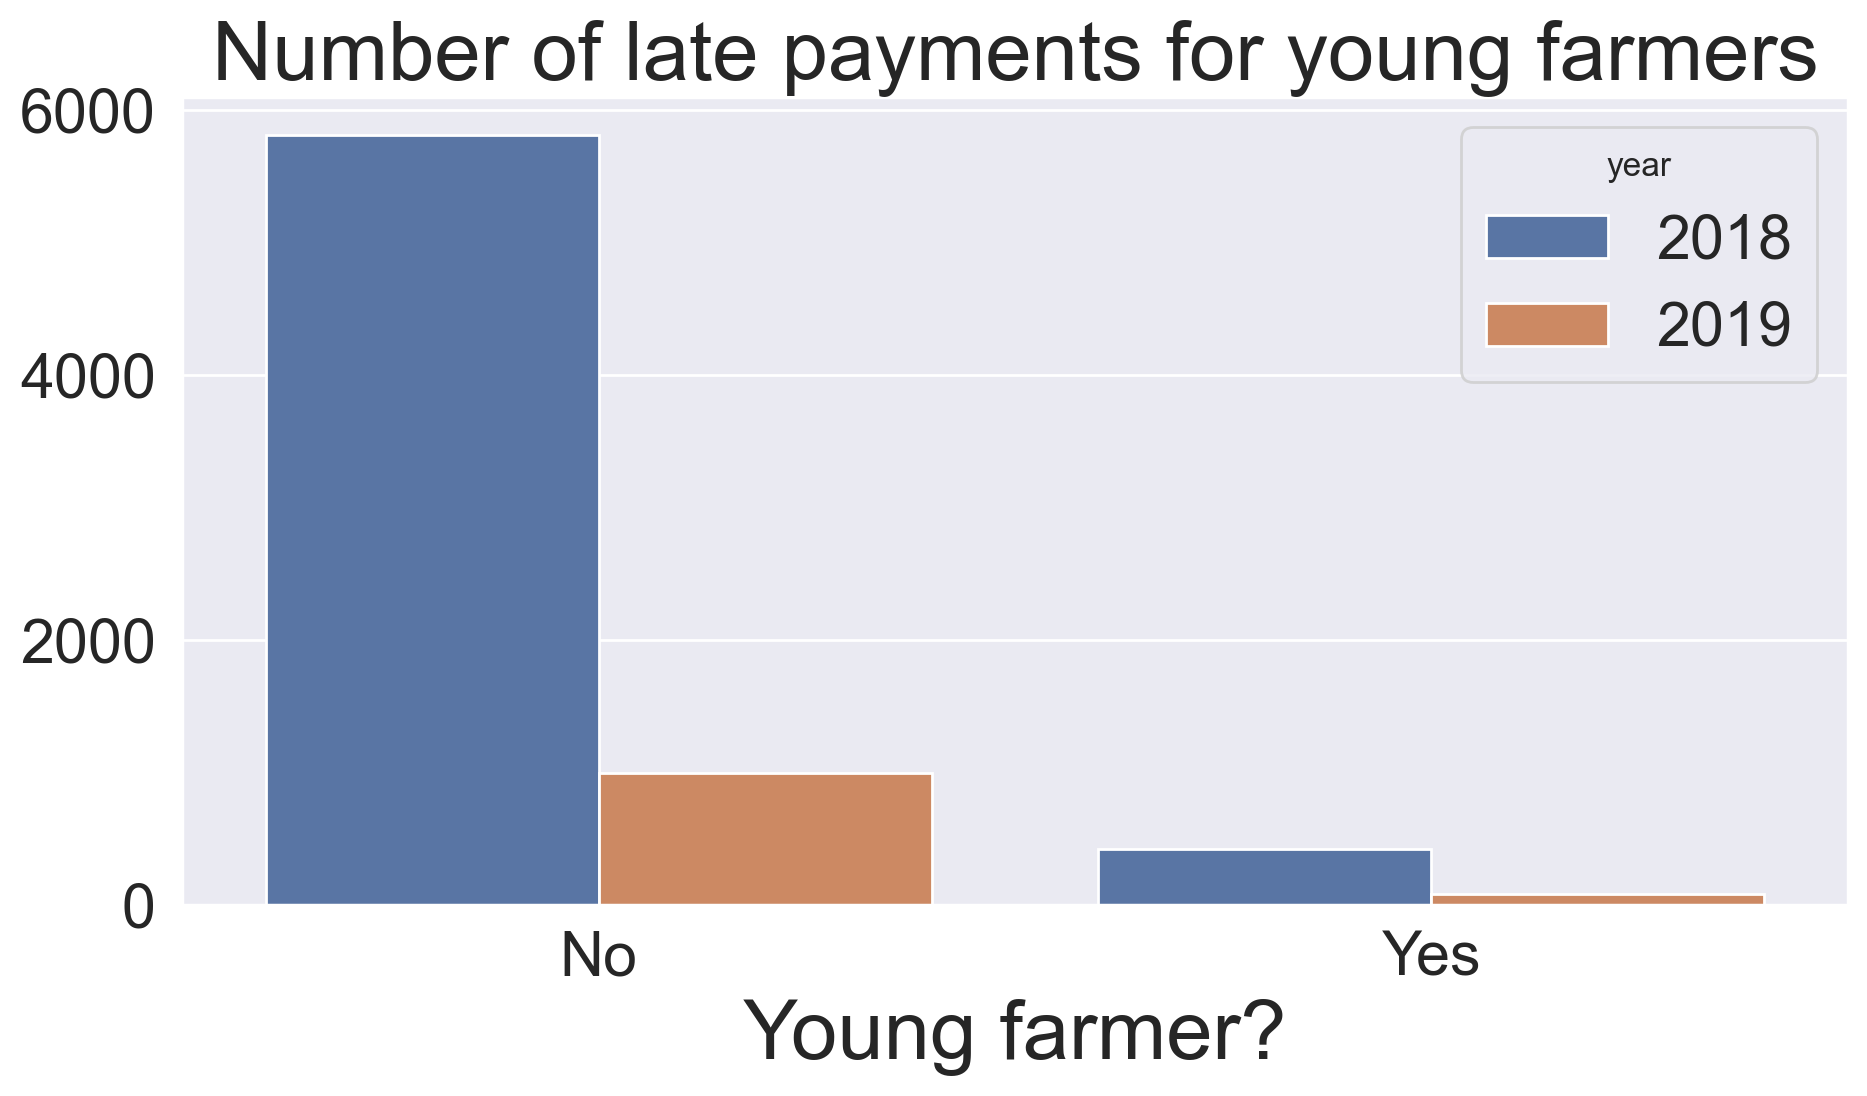

In [47]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_abort['young_farmer'], hue=data_pay_abort['year'])
ax1.set_xlabel("Young farmer?", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of late payments for young farmers",fontsize=30)
fig1.tight_layout()
fig1.savefig('Late_payments_young_farmer.png')

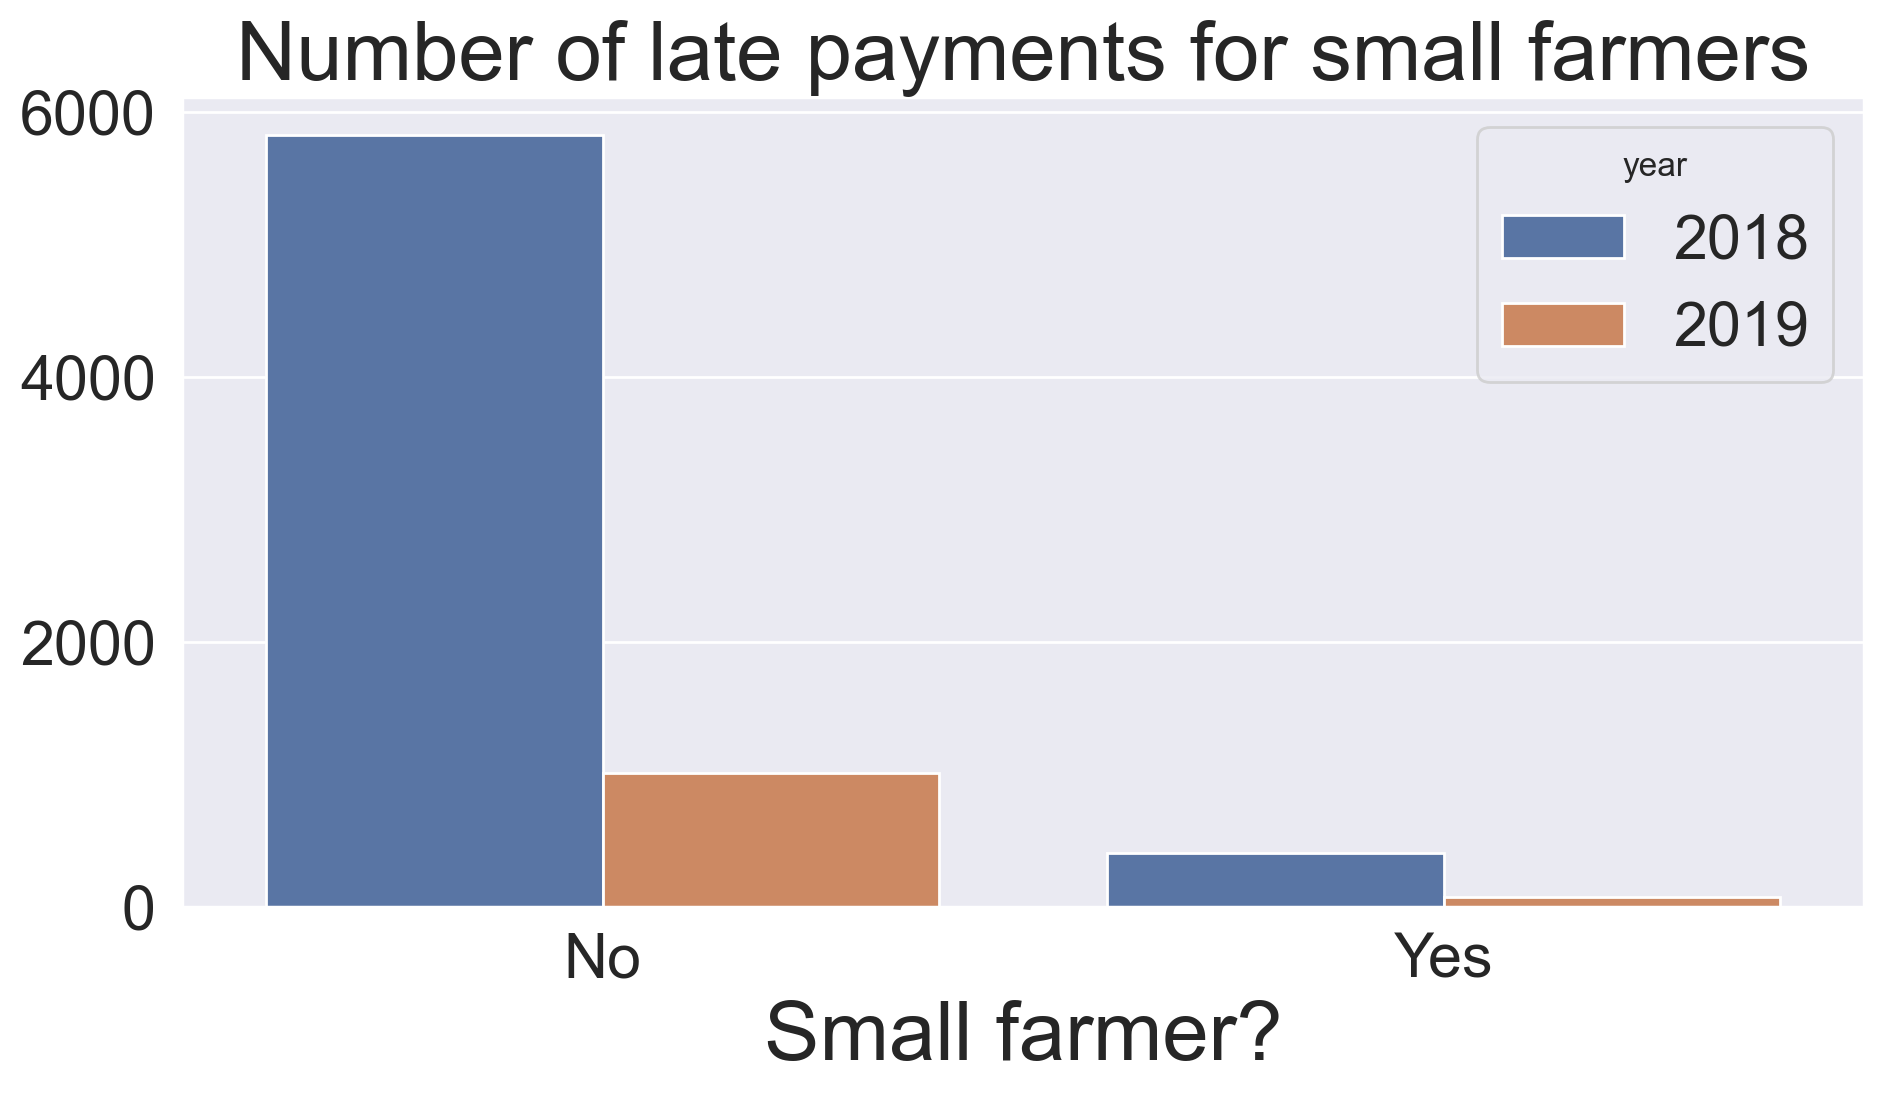

In [48]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_abort['small_farmer'], hue=data_pay_abort['year'])
ax1.set_xlabel("Small farmer?", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of late payments for small farmers",fontsize=30)
fig1.tight_layout()
fig1.savefig('Late_payments_small_farmer.png')

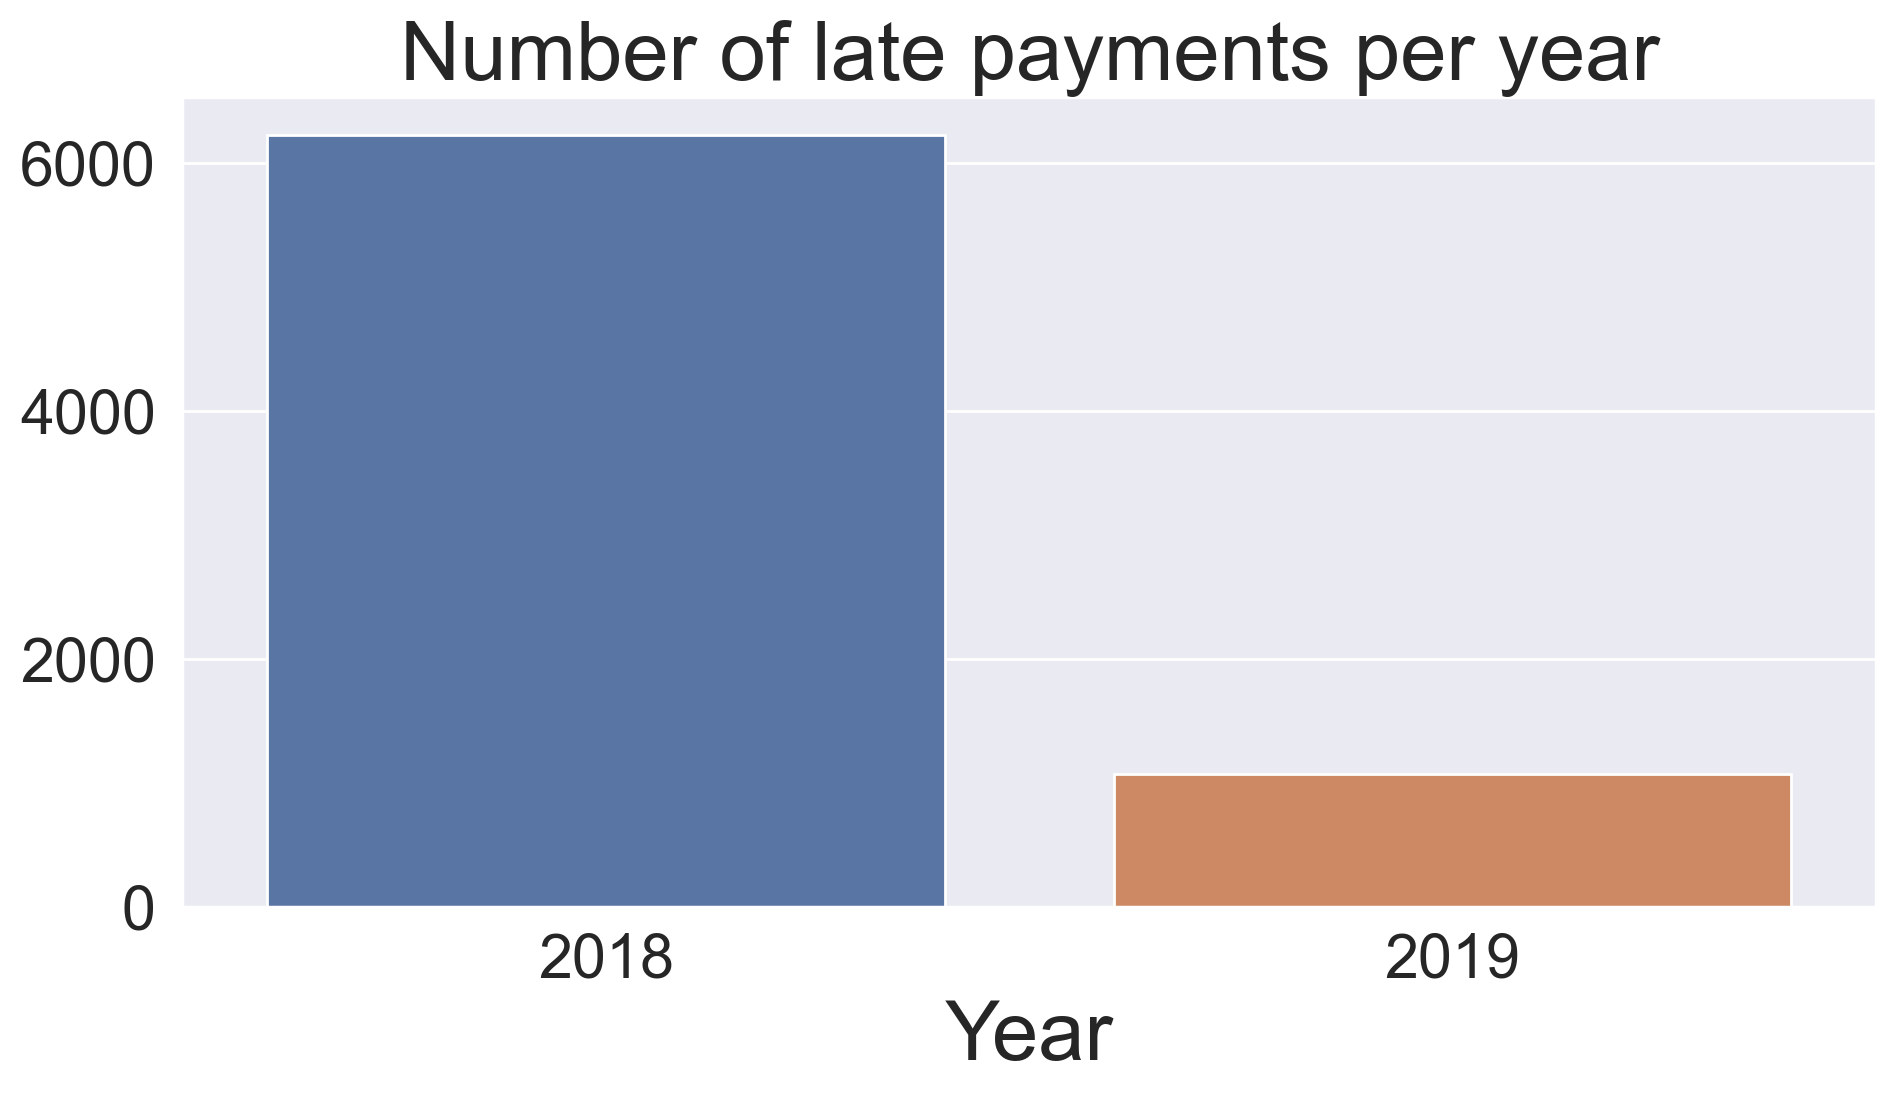

In [189]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_abort['year_x'])
ax1.set_xlabel("Year", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of late payments per year",fontsize=30)
fig1.tight_layout()
fig1.savefig('Late_payments_per_year.png')

## 2. Reopenings

In [58]:
#filter for subprocesses Objection and Change
data_obj_ch = data_prepared[(data_prepared['subprocess'] == "Objection") | (data_prepared['subprocess'] == "Change")]

In [59]:
data_obj_ch

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
1926,1bc4cff9797248bd-36918.56,Payment application-Change-initialize,727350,12.01.2020 19:53:29,122.5659,4e,30,36933.21,-137.22,NaN,NaN,No,2018,No,initialize,Payment application,Change
1927,1bc4cff9797248bd-36918.56,Payment application-Change-begin editing,727350,12.01.2020 19:53:30,122.5659,4e,30,36933.21,-137.22,NaN,NaN,No,2018,No,begin editing,Payment application,Change
1928,1bc4cff9797248bd-36918.56,Payment application-Change-calculate,727350,12.01.2020 19:53:38,122.5659,4e,30,36933.21,-137.22,NaN,NaN,No,2018,No,calculate,Payment application,Change
1930,1bc4cff9797248bd-36918.56,Payment application-Change-calculate,19209,18.01.2020 10:54:48,122.5659,4e,30,36933.21,-137.22,NaN,NaN,No,2018,No,calculate,Payment application,Change
1931,1bc4cff9797248bd-36918.56,Payment application-Change-finish editing,19209,18.01.2020 10:55:32,122.5659,4e,30,36933.21,-137.22,NaN,NaN,No,2018,No,finish editing,Payment application,Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385748,e64a80799fee4df5-59485.69,Payment application-Objection-initialize,2ca0ae,16.01.2020 13:50:25,201.5326,e7,68,59402.49,0.00,NaN,NaN,No,2019,No,initialize,Payment application,Objection
385749,e64a80799fee4df5-59485.69,Payment application-Objection-begin admissibil...,2ca0ae,16.01.2020 13:50:25,201.5326,e7,68,59402.49,0.00,NaN,NaN,No,2019,No,begin admissibility check,Payment application,Objection
385750,e64a80799fee4df5-59485.69,Payment application-Objection-check admissibility,2ca0ae,16.01.2020 13:50:25,201.5326,e7,68,59402.49,0.00,NaN,NaN,No,2019,No,check admissibility,Payment application,Objection
385751,e64a80799fee4df5-59485.69,Payment application-Objection-calculate,2ca0ae,16.01.2020 13:50:35,201.5326,e7,68,59402.49,0.00,NaN,NaN,No,2019,No,calculate,Payment application,Objection


In [63]:
#filter for unique case ids
data_pay_obj_ch = data_obj_ch.drop_duplicates(subset='case id', keep="first")

In [64]:
data_pay_obj_ch

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
1926,1bc4cff9797248bd-36918.56,Payment application-Change-initialize,727350,12.01.2020 19:53:29,122.5659,4e,30,36933.21,-137.22,NaN,NaN,No,2018,No,initialize,Payment application,Change
4177,d38318b279b5282f-30280.6,Payment application-Change-initialize,dee71b,15.02.2019 08:39:21,101.7330,4e,31,30292.55,NaN,NaN,NaN,No,2018,No,initialize,Payment application,Change
4287,fff750353a66eba6-156230.72,Payment application-Change-initialize,727350,12.01.2020 19:49:52,404.0512,4e,82,156224.73,-132.43,NaN,NaN,No,2018,No,initialize,Payment application,Change
4892,9c0c92bc3c13c12b-39361.02,Payment application-Change-initialize,dee71b,02.03.2019 07:27:46,134.2932,4e,45,39376.91,NaN,NaN,NaN,No,2018,No,initialize,Payment application,Change
5287,67a15a64917dbb28-26600.88,Payment application-Change-initialize,f9fe07,31.08.2019 13:46:41,88.3559,e7,29,26611.33,-118.22,NaN,NaN,No,2018,No,initialize,Payment application,Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270621,9e38dcfd17017f68-32945.57,Payment application-Objection-initialize,2ca0ae,18.01.2020 15:25:58,112.9192,e7,45,32841.73,NaN,NaN,NaN,No,2019,No,initialize,Payment application,Objection
273404,01f79782483c9357-1313.93,Payment application-Objection-initialize,2ca0ae,16.01.2020 13:33:19,1.4632,e7,2,156.83,NaN,NaN,NaN,No,2019,No,initialize,Payment application,Objection
300608,a41b84deb0eacf3e-13934.98,Payment application-Objection-initialize,2ca0ae,18.01.2020 15:26:36,44.2194,e7,20,11875.25,NaN,NaN,NaN,No,2019,No,initialize,Payment application,Objection
367146,fe61e512b3a33068-15228.04,Payment application-Objection-initialize,2ca0ae,17.01.2020 15:20:54,47.0486,e7,11,13701.31,1522.45,NaN,NaN,No,2019,No,initialize,Payment application,Objection


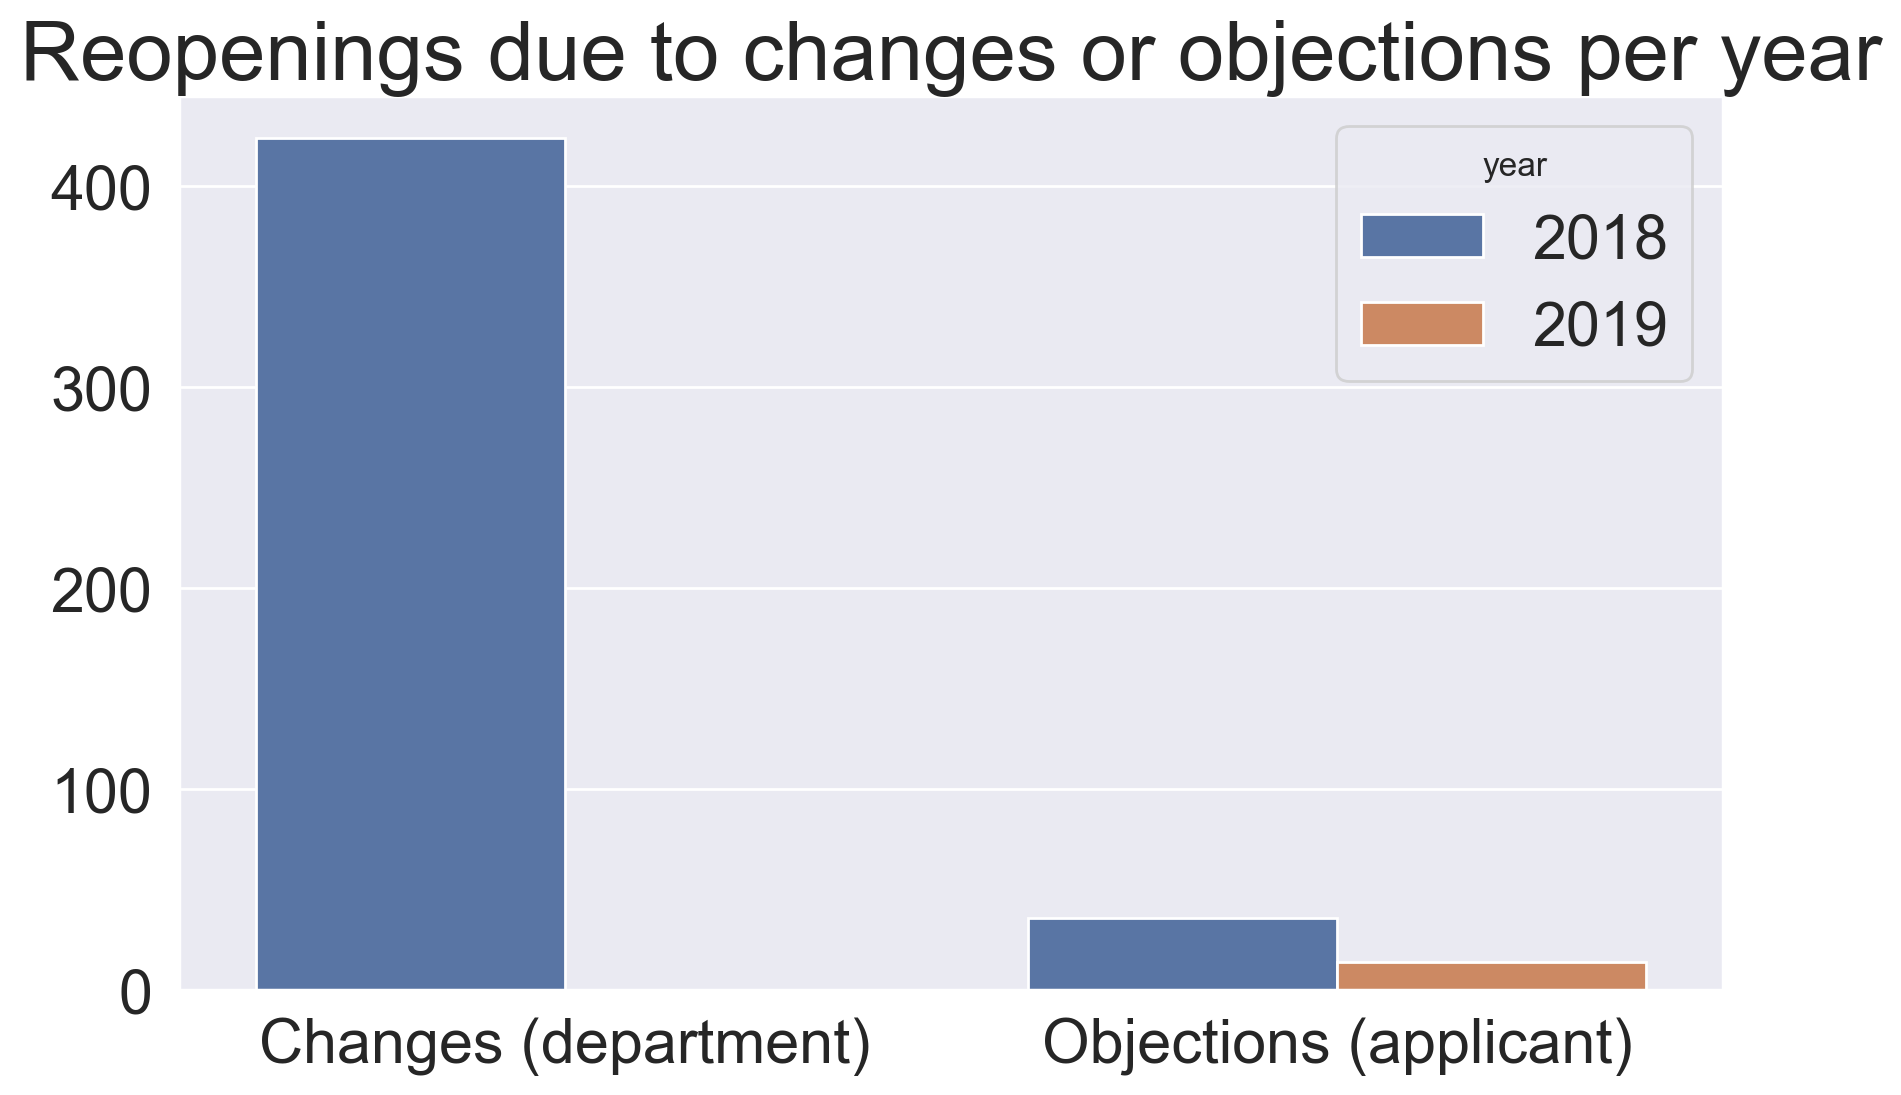

In [65]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_obj_ch['subprocess'], hue=data_pay_obj_ch["year"])
ax1.set_xlabel("", fontsize=30)
ax1.set_ylabel("", fontsize=15)
labels = ["Changes (department)", "Objections (applicant)"]
ax1.set_xticklabels(labels)
ax1.set_title("Reopenings due to changes or objections per year",fontsize=30)
fig1.tight_layout()
fig1.savefig('Reopening_per_year.png')

In [67]:
data_pay_obj_ch[["payment_actual2", "payment_actual2"]]

,payment_actual2,payment_actual2
1926,NaN,NaN
4177,NaN,NaN
4287,NaN,NaN
4892,NaN,NaN
5287,NaN,NaN
...,...,...
270621,NaN,NaN
273404,NaN,NaN
300608,NaN,NaN
367146,NaN,NaN


In [68]:
data_pay_obj_ch["payment_actual2"].unique()

array([    nan, -612.84, -385.55])

In [69]:
#Filter for a second payment
data_pay_obj_ch_1 = data_pay_obj_ch[(data_pay_obj_ch["payment_actual1"] >0) | (data_pay_obj_ch["payment_actual1"] <0)]

In [70]:
#Distinguish between payment and reimbursement
data_pay_obj_ch_1["Payment"] = data_pay_obj_ch_1.apply(lambda x: "Payment" if x["payment_actual1"] >0 else "Reimbursement", axis=1)

C:\Users\vikto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
#Filter for a third payment
data_pay_obj_ch_2 = data_pay_obj_ch[(data_pay_obj_ch["payment_actual2"] >0) | (data_pay_obj_ch["payment_actual2"] <0)]
data_pay_obj_ch_2

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess
12114,aef504eb0e3c5dca-41273.64,Payment application-Change-initialize,7b9b55,15.02.2019 07:46:59,140.9818,d4,35,41290.06,0.00,-612.84,NaN,No,2018,No,initialize,Payment application,Change
310056,e799f40403d42fee-54657.31,Payment application-Change-initialize,af1e1e,21.03.2019 08:16:28,183.2293,4e,56,54679.32,-120.96,-385.55,NaN,No,2018,No,initialize,Payment application,Change


In [72]:
#Filter for a fourth payment
data_pay_obj_ch_3 = data_pay_obj_ch[(data_pay_obj_ch["payment_actual3"] >0) | (data_pay_obj_ch["payment_actual3"] <0)]
data_pay_obj_ch_3

,case id,combined_activity,resource,complete timestamp,area,department,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,small_farmer,year,young_farmer,activity,doctype,subprocess


In [73]:
#concatenate second and third payment --> no fourth payment!
data_pay_obj_ch_1_2 = pd.concat([data_pay_obj_ch_1, data_pay_obj_ch_2])

C:\Users\vikto\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [74]:
data_pay_obj_ch_1_2[data_pay_obj_ch_1_2["Payment"]=="Reimbursement"]

,Payment,activity,area,case id,combined_activity,complete timestamp,department,doctype,number_parcels,payment_actual0,payment_actual1,payment_actual2,payment_actual3,resource,small_farmer,subprocess,year,young_farmer
1926,Reimbursement,initialize,122.5659,1bc4cff9797248bd-36918.56,Payment application-Change-initialize,12.01.2020 19:53:29,4e,Payment application,30,36933.21,-137.22,NaN,NaN,727350,No,Change,2018,No
4287,Reimbursement,initialize,404.0512,fff750353a66eba6-156230.72,Payment application-Change-initialize,12.01.2020 19:49:52,4e,Payment application,82,156224.73,-132.43,NaN,NaN,727350,No,Change,2018,No
5287,Reimbursement,initialize,88.3559,67a15a64917dbb28-26600.88,Payment application-Change-initialize,31.08.2019 13:46:41,e7,Payment application,29,26611.33,-118.22,NaN,NaN,f9fe07,No,Change,2018,No
6912,Reimbursement,initialize,267.6823,489eb2bcda130b65-83174.84,Payment application-Change-initialize,17.03.2019 10:54:19,4e,Payment application,73,83209.56,-118.21,NaN,NaN,af1e1e,No,Change,2018,Yes
7597,Reimbursement,initialize,131.1465,bacdc3d5511d16c6-39361.02,Payment application-Change-initialize,08.03.2019 13:04:54,4e,Payment application,19,39376.71,-114.04,NaN,NaN,19209,No,Change,2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362632,Reimbursement,initialize,137.6173,22296ee3effe7d73-44583.41,Payment application-Change-initialize,12.01.2020 19:52:47,4e,Payment application,33,44601.45,-106.04,NaN,NaN,727350,No,Change,2018,Yes
364550,Reimbursement,initialize,63.8404,91b8752ed9de48d0-22917.65,Payment application-Change-initialize,12.07.2019 10:13:51,4e,Payment application,11,22826.59,-847.51,NaN,NaN,fcb55b,No,Change,2018,Yes
367121,Reimbursement,initialize,36.2539,47c2a1ec2e28bffd-12505.21,Payment application-Change-initialize,12.01.2020 18:46:26,6b,Payment application,11,12509.52,-277.56,NaN,NaN,727350,No,Change,2018,No
367477,Reimbursement,initialize,122.5659,3646b52d84456275-36918.56,Payment application-Change-initialize,31.08.2019 11:09:22,4e,Payment application,32,36933.17,-1415.83,NaN,NaN,44798d,No,Change,2018,No


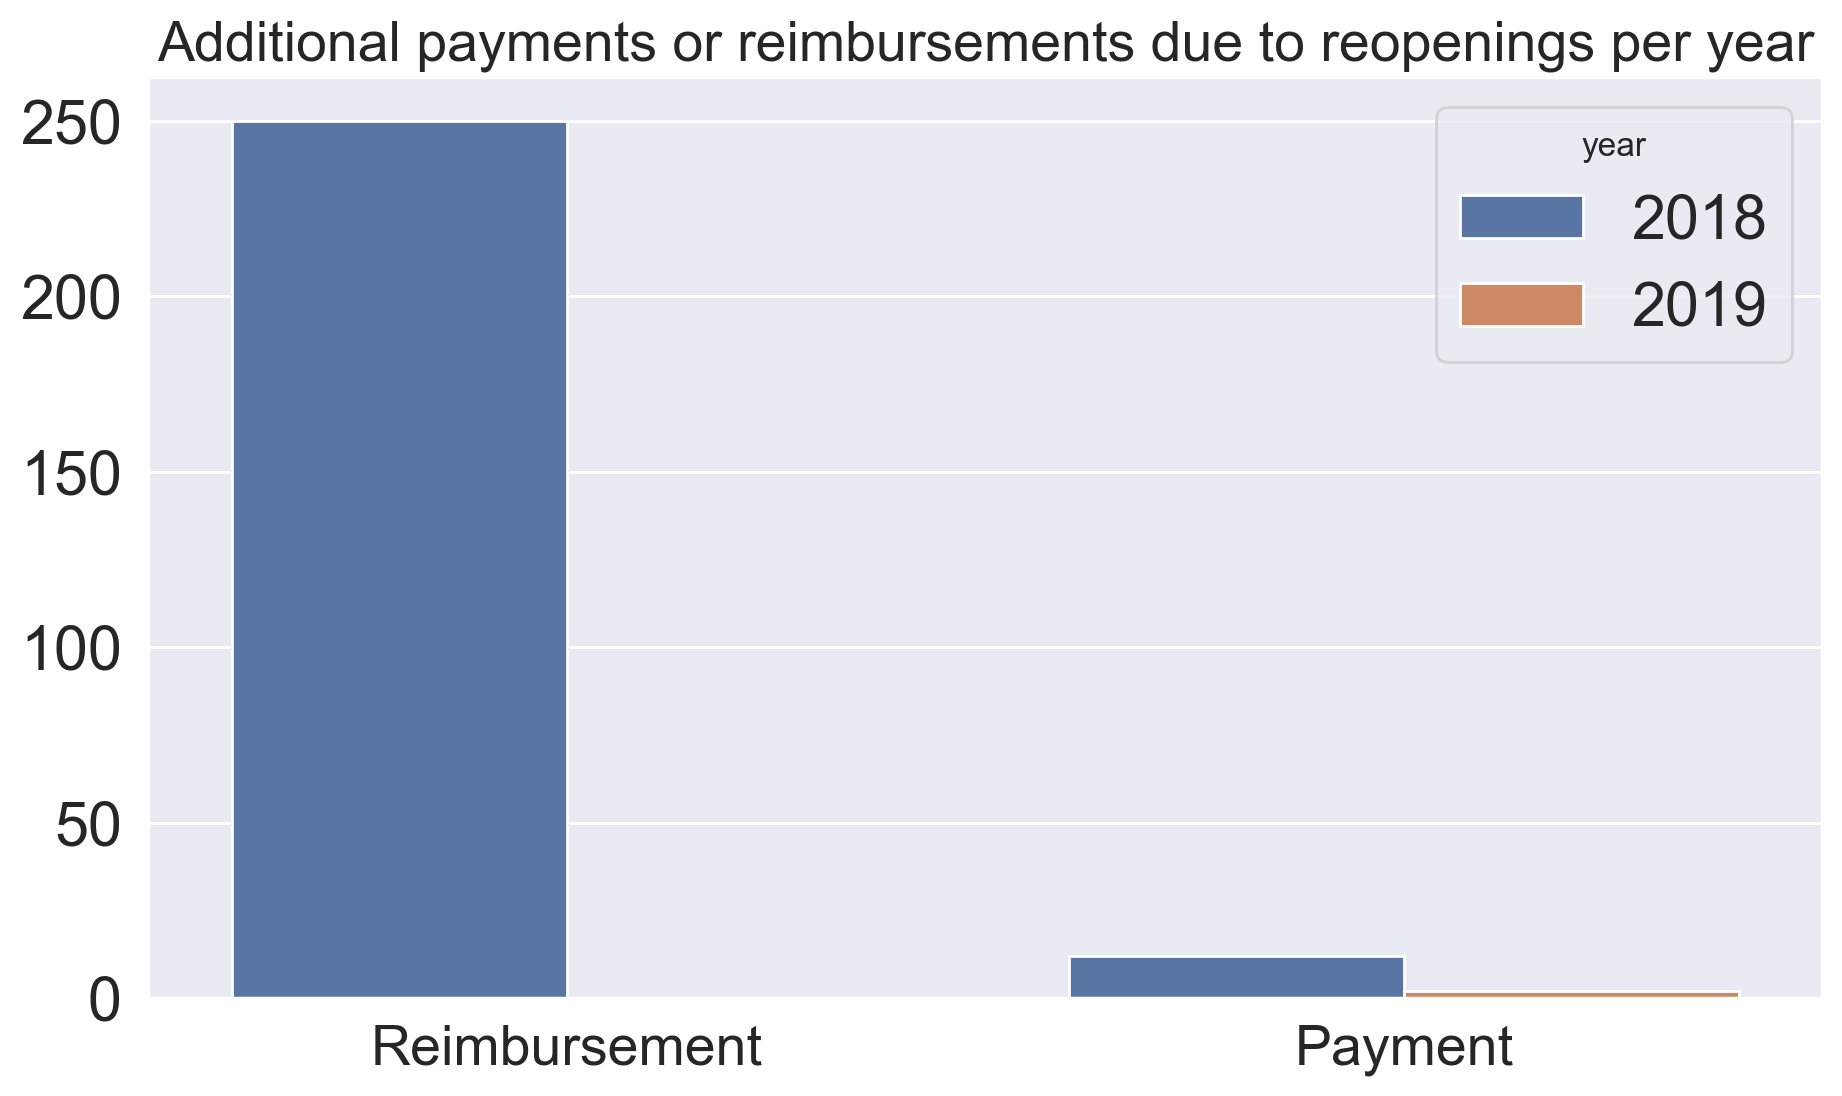

In [75]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_obj_ch_1_2["Payment"], hue=data_pay_obj_ch_1_2["year"])
ax1.set_xlabel("", fontsize=40)
ax1.set_ylabel("", fontsize=15)
#labels = ["Changes (department)", "Objections (applicant)"]
#ax1.set_xticklabels(labels)
ax1.set_xticklabels(["Reimbursement", "Payment"], size = 20)
ax1.set_title("Additional payments or reimbursements due to reopenings per year",fontsize=20)
fig1.tight_layout()
fig1.savefig('Additional_payment_per_year.png')

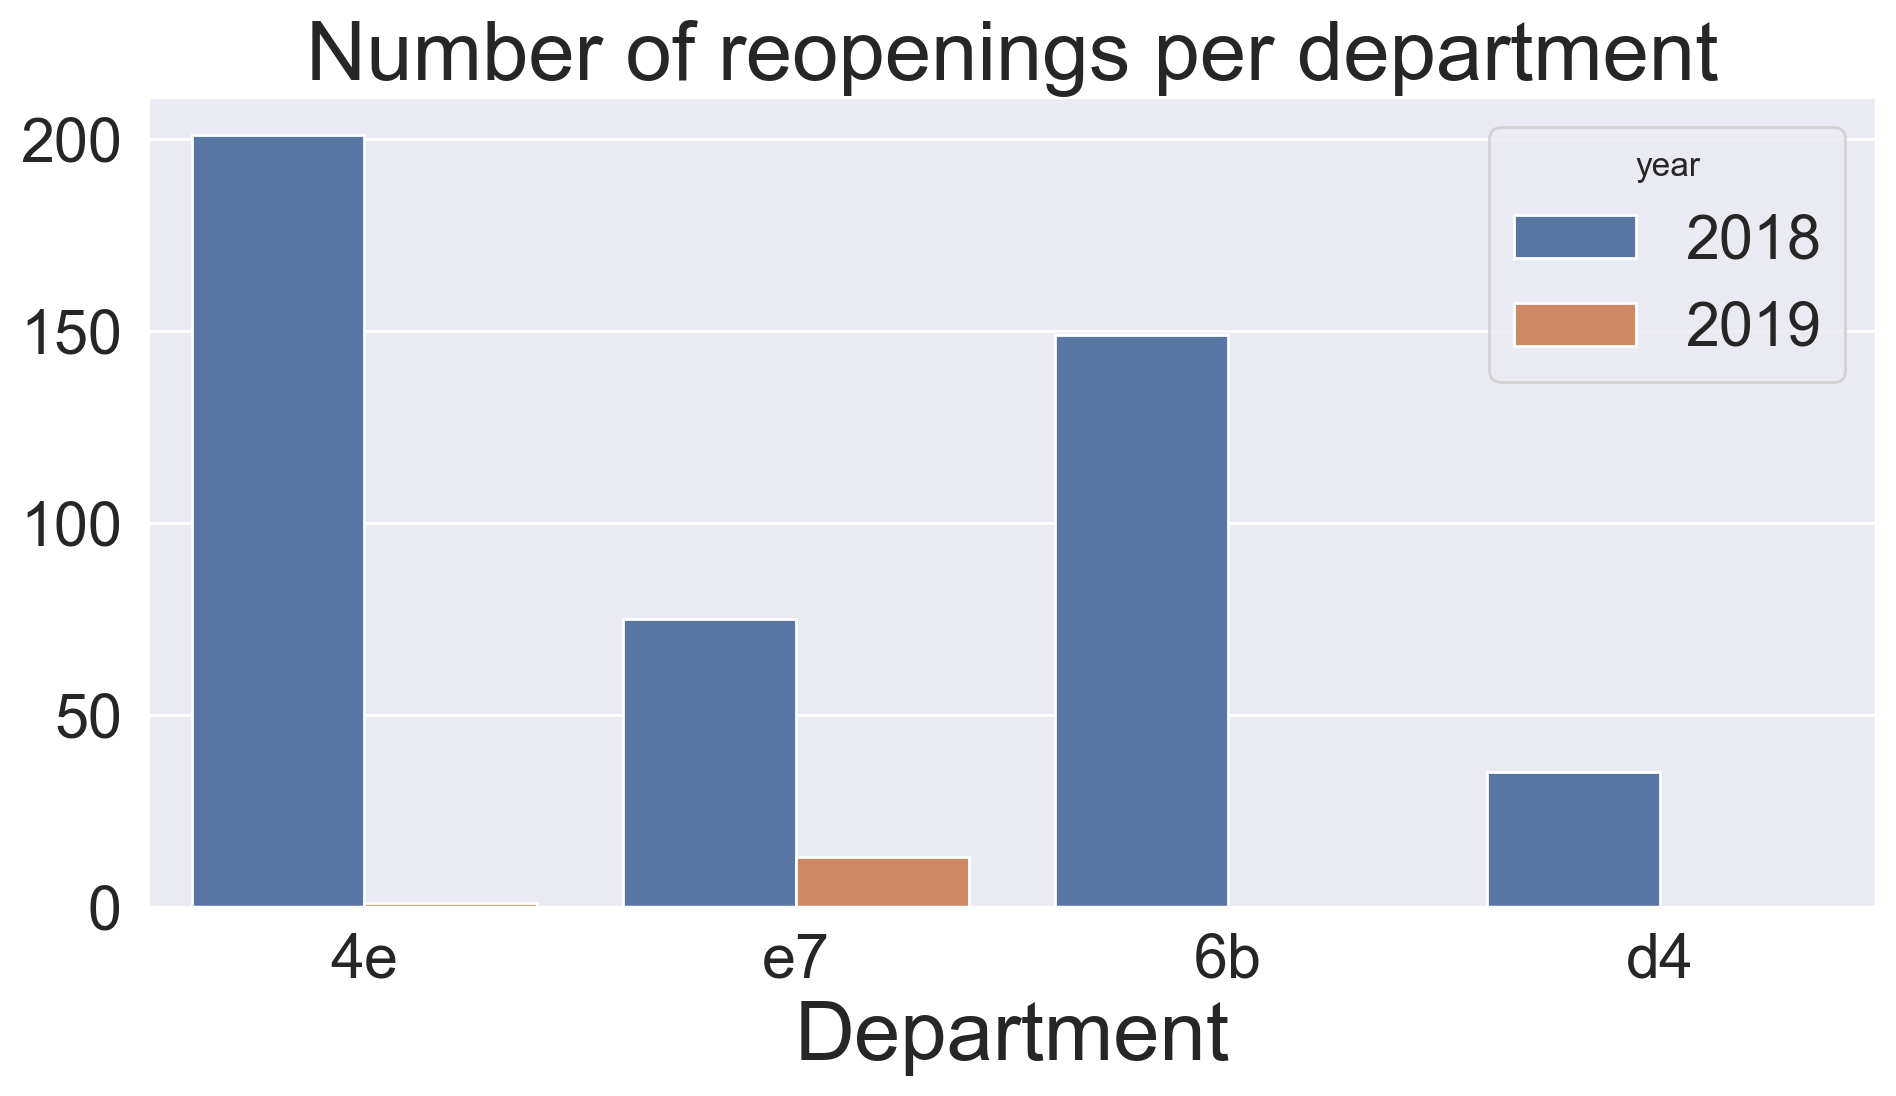

In [76]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)
sns.countplot(data_pay_obj_ch['department'], hue=data_pay_obj_ch['year'])
ax1.set_xlabel("Department", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of reopenings per department",fontsize=30)
fig1.tight_layout()
fig1.savefig('Reopenings_department.png')

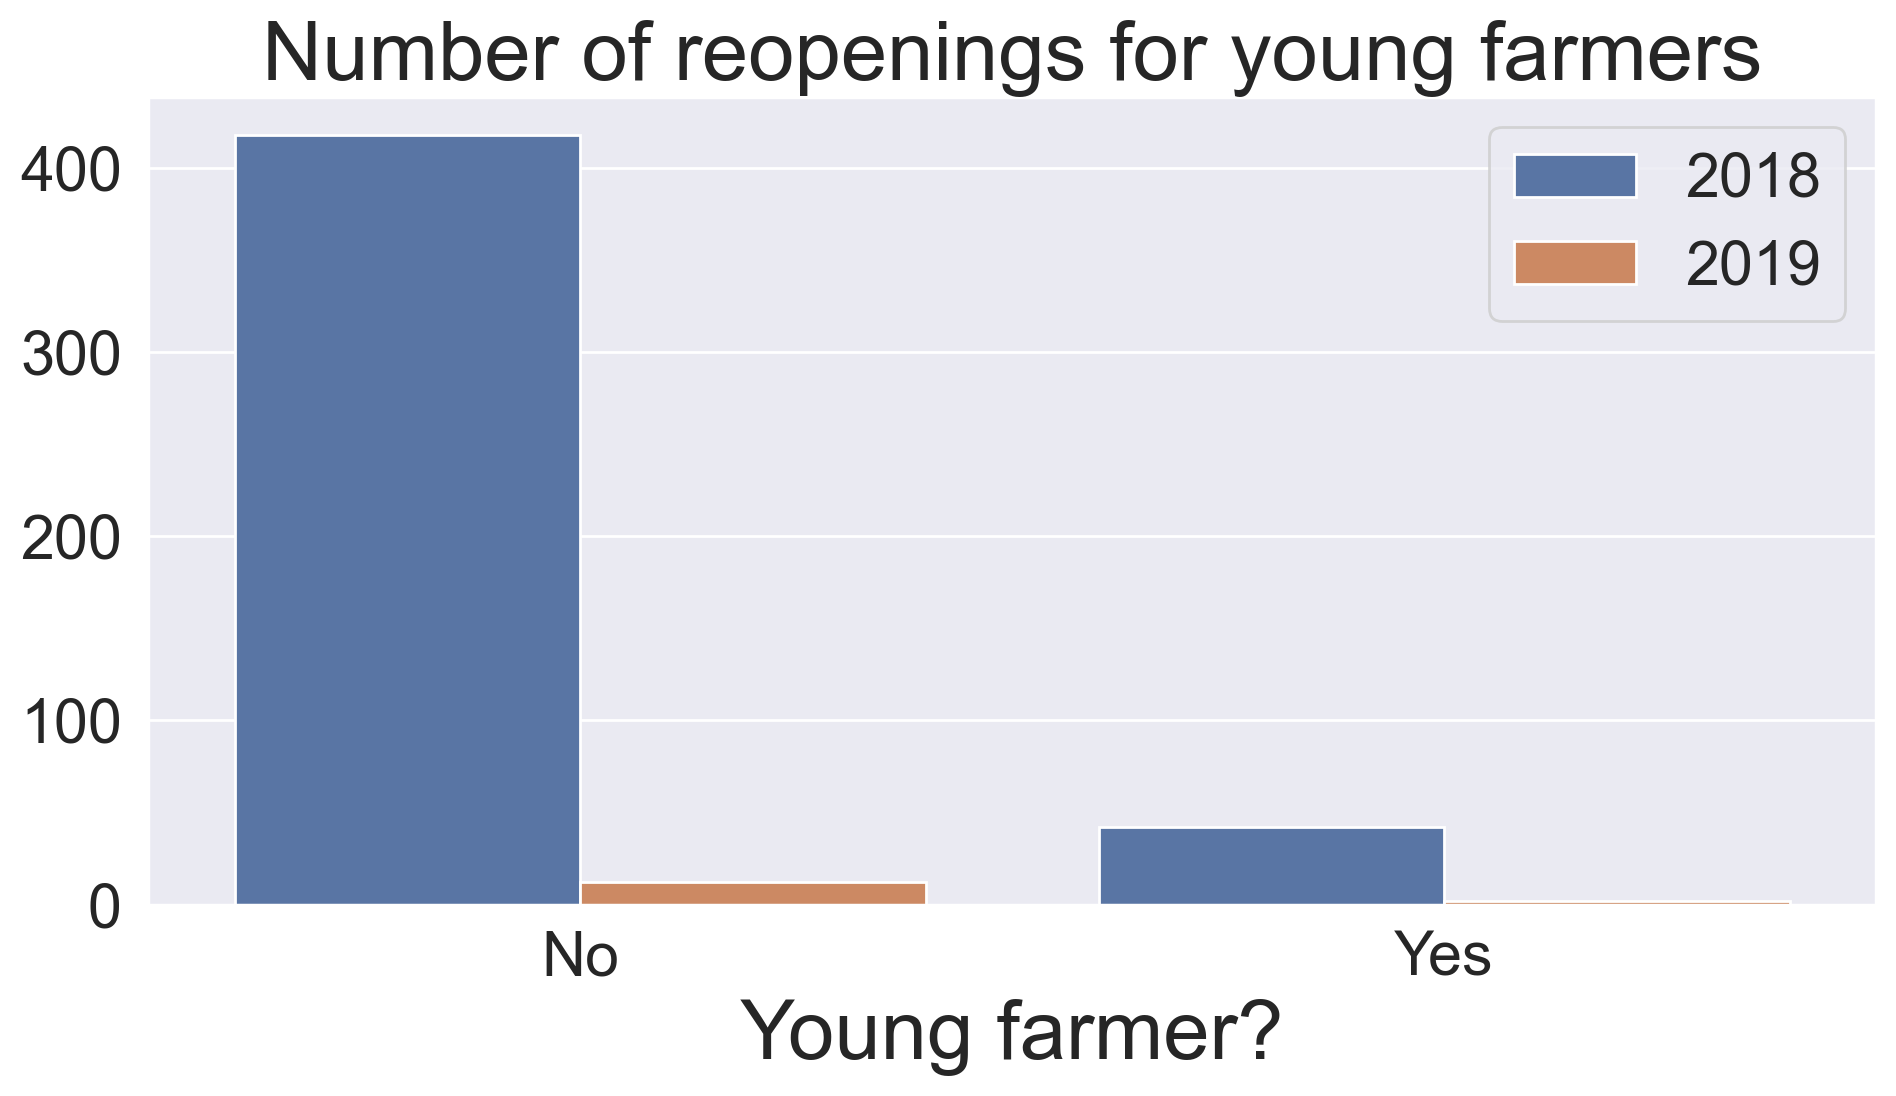

In [77]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_obj_ch['young_farmer'], hue=data_pay_obj_ch['year'])
ax1.set_xlabel("Young farmer?", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of reopenings for young farmers",fontsize=30)
ax1.legend(loc=1)
fig1.tight_layout()
fig1.savefig('Reopenings_young_farmer.png')

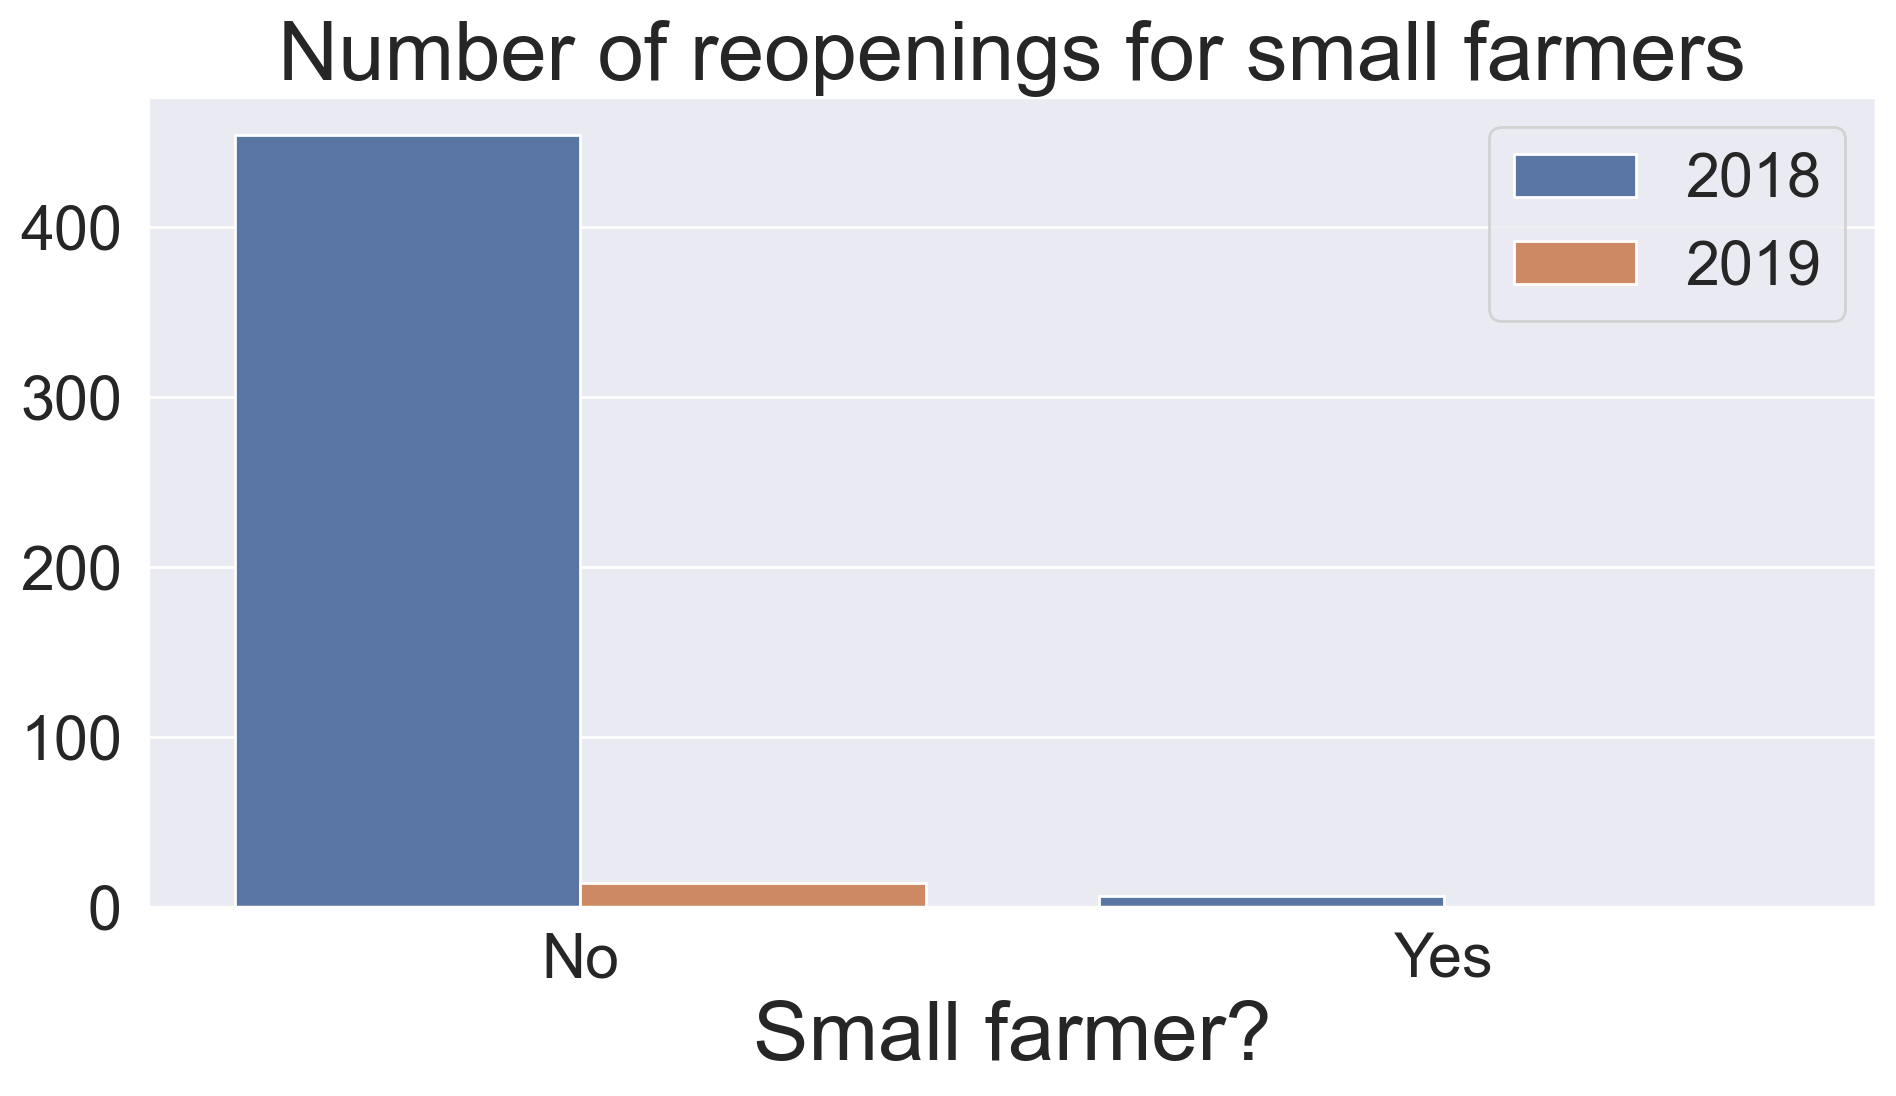

In [78]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=200)

sns.countplot(data_pay_obj_ch['small_farmer'], hue=data_pay_obj_ch['year'])
ax1.set_xlabel("Small farmer?", fontsize=30)
ax1.set_ylabel("", fontsize=15)
ax1.set_title("Number of reopenings for small farmers",fontsize=30)
ax1.legend(loc=1)
fig1.tight_layout()
fig1.savefig('Reopenings_small_farmer.png')